In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [4]:
img_as_3d_array = mpimg.imread("dog_image.jfif")

In [6]:
img_as_3d_array.shape #height , width and color channel (RGB)

(234, 375, 3)

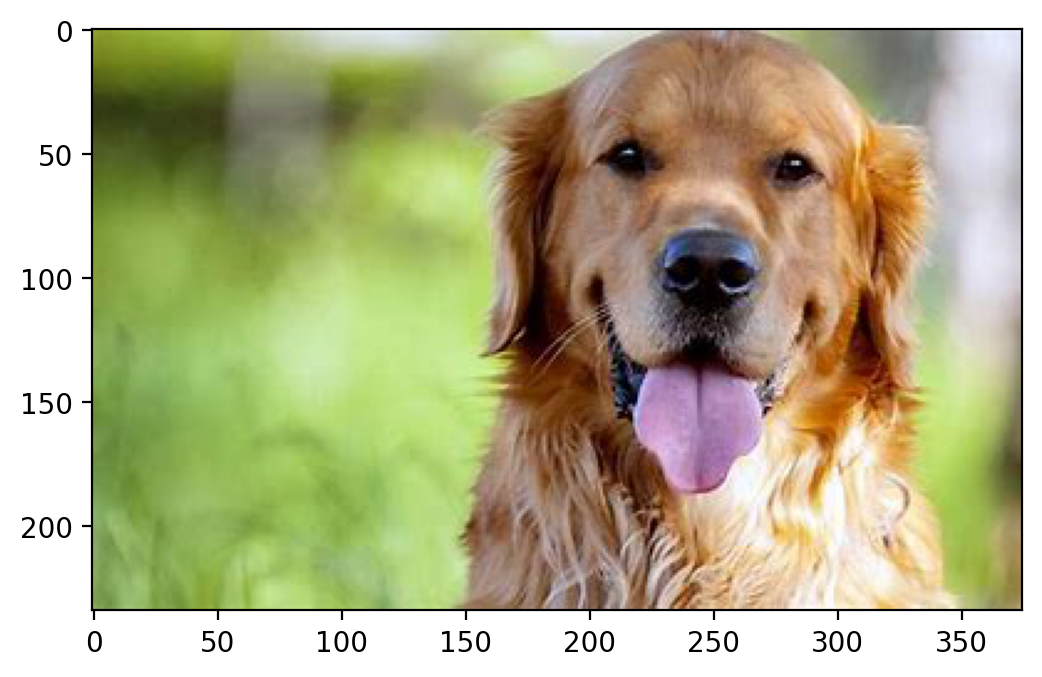

In [8]:
plt.figure(dpi = 200)

plt.imshow(img_as_3d_array);

Lets now do the color quantization....

for that we have to convert our 3d array of image into 2d array 

because our Kmeans algo is only designed for 2d data

In [9]:
(height , weidth , colors) = img_as_3d_array.shape

In [10]:
print(height, weidth , colors)

234 375 3


In [11]:
# so we now have separated height, weidth and color components.

#now lets convert 3d img array into 2d array

In [12]:
img_as_2d_array = img_as_3d_array.reshape(height * weidth , colors)

In [13]:
img_as_2d_array

array([[151, 167,  58],
       [148, 164,  55],
       [145, 161,  52],
       ...,
       [164, 148,  99],
       [181, 162, 119],
       [184, 162, 121]], dtype=uint8)

In [14]:
print(img_as_3d_array.ndim , img_as_2d_array.ndim)

#checking dimensions

3 2


In [15]:
# So now we are ready to perform KMeans Clustering

In [38]:
from sklearn.cluster import KMeans

In [42]:
model = KMeans(n_clusters= 10)

In [43]:
labels = model.fit_predict(img_as_2d_array)

In [44]:
labels

array([9, 9, 9, ..., 7, 6, 6])

In [45]:
model.cluster_centers_

#checking cluster centers

array([[195.21908366, 175.31909718, 169.06014326],
       [ 38.85781041,  13.70160214,   9.82242991],
       [155.27139083, 186.04593185,  93.07404647],
       [192.08526364, 219.67570863, 132.62374276],
       [150.96920708, 100.59368745,  57.63510393],
       [231.01974043, 222.3956811 , 210.89737158],
       [206.92093441, 161.31446541, 111.58382749],
       [150.03882363, 129.78047155, 111.79655086],
       [ 89.97253614,  69.84323259,  33.61051248],
       [125.87737599, 151.03419101,  65.31965693]])

In [46]:
#lets round these values and change dtype as int

In [47]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [48]:
rgb_codes

array([[195, 175, 169],
       [ 39,  14,  10],
       [155, 186,  93],
       [192, 220, 133],
       [151, 101,  58],
       [231, 222, 211],
       [207, 161, 112],
       [150, 130, 112],
       [ 90,  70,  34],
       [126, 151,  65]])

### now we know that our labes array is associated with RGB codes so lets assign them as below

In [49]:
rgb_codes

array([[195, 175, 169],
       [ 39,  14,  10],
       [155, 186,  93],
       [192, 220, 133],
       [151, 101,  58],
       [231, 222, 211],
       [207, 161, 112],
       [150, 130, 112],
       [ 90,  70,  34],
       [126, 151,  65]])

In [50]:
labels

array([9, 9, 9, ..., 7, 6, 6])

In [51]:
rgb_codes[labels]

array([[126, 151,  65],
       [126, 151,  65],
       [126, 151,  65],
       ...,
       [150, 130, 112],
       [207, 161, 112],
       [207, 161, 112]])

In [52]:
img_as_2d_array

array([[151, 167,  58],
       [148, 164,  55],
       [145, 161,  52],
       ...,
       [164, 148,  99],
       [181, 162, 119],
       [184, 162, 121]], dtype=uint8)

In [53]:
# we can see the points have changed.

# its because rgb_codes[labes] is assigning points near to cluster center

In [54]:
## Now lets change our new points again into 3d and view the image

In [55]:
quantized_img = np.reshape(rgb_codes[labels] , (height , weidth, colors))

In [56]:
#quantized_img

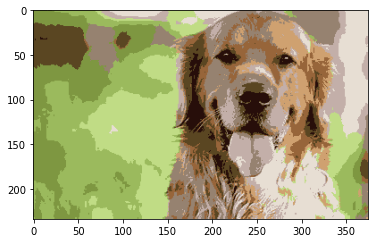

In [58]:
plt.imshow(quantized_img);

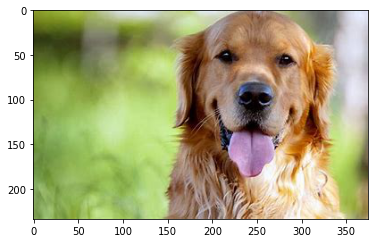

In [60]:
plt.imshow(img_as_3d_array);

In [61]:
ssd = []

for k in range(2,50):
    
    model = KMeans(n_clusters=k)
    model.fit_predict(img_as_2d_array)
    
    ssd.append(model.inertia_)

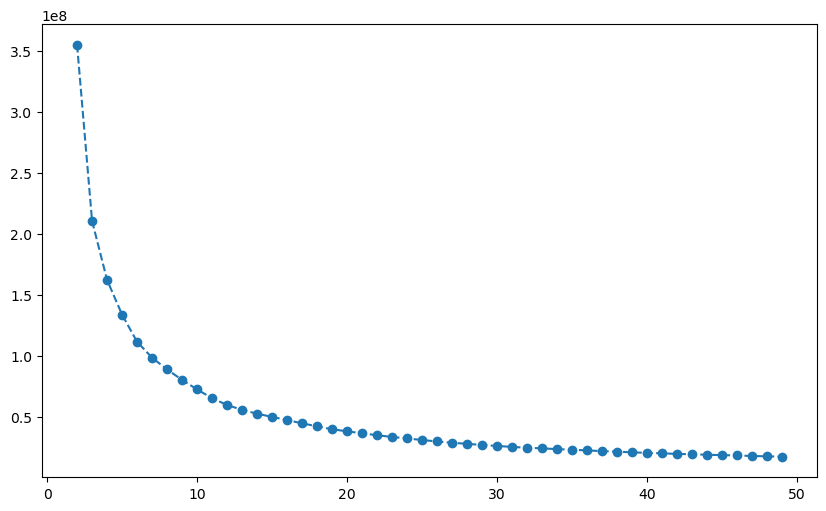

In [62]:
plt.figure(figsize = (10,6), dpi = 100)

plt.plot(range(2,50) , ssd, "o--")

In [64]:
model = KMeans(n_clusters =17 )

In [65]:
labels = model.fit_predict(img_as_2d_array)

In [66]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [67]:
rgb_codes[labels]

array([[138, 167,  77],
       [138, 167,  77],
       [138, 167,  77],
       ...,
       [161, 135, 109],
       [211, 167, 118],
       [211, 167, 118]])

In [68]:
quantized_img = np.reshape(rgb_codes[labels] , (height , weidth, colors))

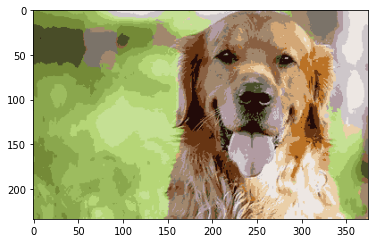

In [69]:
plt.imshow(quantized_img);

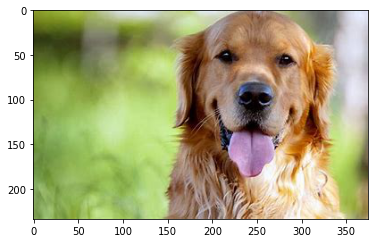

In [70]:
plt.imshow(img_as_3d_array);